# NFL Big Data Bowl
## Plotting the field

Using some code that I developed for last year's NFL challenege, this notebook shows how to plot player positions during a play on the football field.

Using matplotlib we can call the `create_football_field` function to create a figure with the football field drawn out. You can then overlay any information from the training data to help visualize how players positions look on the field.

The design is loosely based off of the 1991 video game [Techo Super Bowl](https://en.wikipedia.org/wiki/Tecmo_Super_Bowl). A game which I spent many hours playing in my next door neighbor's basement growing up (I wasn't allowed to own a video game console so we had to play at his house).
![](https://upload.wikimedia.org/wikipedia/en/d/d7/Tecmosuperbowl.png)


In [5]:
import pandas as pd
import numpy as np
import os
import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib.patches as patches
pd.set_option('max_columns', 100)

# train = pd.read_csv('../input/nfl-big-data-bowl-2020/train.csv', low_memory=False)
# train2021 = pd.read_csv('../input/nfl-big-data-bowl-2021/plays.csv')

FileNotFoundError: [Errno 2] No such file or directory: '../input/nfl-big-data-bowl-2020/train.csv'

## Function to Create The Football Field

In [3]:
def create_football_field(linenumbers=True,
                          endzones=True,
                          highlight_line=False,
                          highlight_line_number=50,
                          highlighted_name='Line of Scrimmage',
                          fifty_is_los=False,
                          figsize=(12, 6.33)):
    """
    Function that plots the football field for viewing plays.
    Allows for showing or hiding endzones.
    """
    rect = patches.Rectangle((0, 0), 120, 53.3, linewidth=0.1,
                             edgecolor='r', facecolor='darkgreen', zorder=0)

    fig, ax = plt.subplots(1, figsize=figsize)
    ax.add_patch(rect)

    plt.plot([10, 10, 10, 20, 20, 30, 30, 40, 40, 50, 50, 60, 60, 70, 70, 80,
              80, 90, 90, 100, 100, 110, 110, 120, 0, 0, 120, 120],
             [0, 0, 53.3, 53.3, 0, 0, 53.3, 53.3, 0, 0, 53.3, 53.3, 0, 0, 53.3,
              53.3, 0, 0, 53.3, 53.3, 0, 0, 53.3, 53.3, 53.3, 0, 0, 53.3],
             color='white')
    if fifty_is_los:
        plt.plot([60, 60], [0, 53.3], color='gold')
        plt.text(62, 50, '<- Player Yardline at Snap', color='gold')
    # Endzones
    if endzones:
        ez1 = patches.Rectangle((0, 0), 10, 53.3,
                                linewidth=0.1,
                                edgecolor='r',
                                facecolor='blue',
                                alpha=0.2,
                                zorder=0)
        ez2 = patches.Rectangle((110, 0), 120, 53.3,
                                linewidth=0.1,
                                edgecolor='r',
                                facecolor='blue',
                                alpha=0.2,
                                zorder=0)
        ax.add_patch(ez1)
        ax.add_patch(ez2)
    plt.xlim(0, 120)
    plt.ylim(-5, 58.3)
    plt.axis('off')
    if linenumbers:
        for x in range(20, 110, 10):
            numb = x
            if x > 50:
                numb = 120 - x
            plt.text(x, 5, str(numb - 10),
                     horizontalalignment='center',
                     fontsize=20,  # fontname='Arial',
                     color='white')
            plt.text(x - 0.95, 53.3 - 5, str(numb - 10),
                     horizontalalignment='center',
                     fontsize=20,  # fontname='Arial',
                     color='white', rotation=180)
    if endzones:
        hash_range = range(11, 110)
    else:
        hash_range = range(1, 120)

    for x in hash_range:
        ax.plot([x, x], [0.4, 0.7], color='white')
        ax.plot([x, x], [53.0, 52.5], color='white')
        ax.plot([x, x], [22.91, 23.57], color='white')
        ax.plot([x, x], [29.73, 30.39], color='white')

    if highlight_line:
        hl = highlight_line_number + 10
        plt.plot([hl, hl], [0, 53.3], color='yellow')
        plt.text(hl + 2, 50, '<- {}'.format(highlighted_name),
                 color='yellow')
    return fig, ax

create_football_field()
plt.show()

NameError: name 'patches' is not defined

# Adding Players For a Play

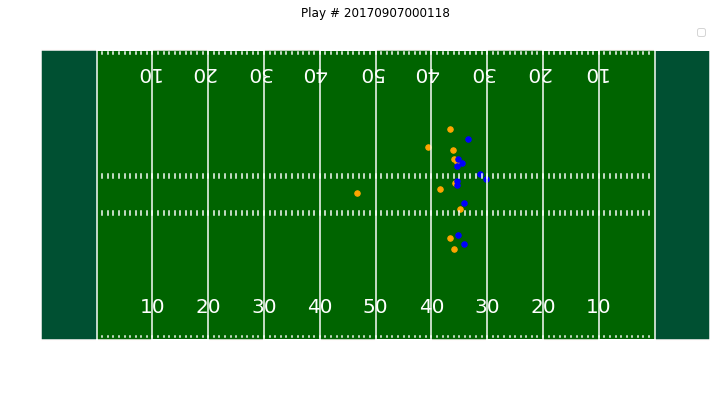

In [3]:
fig, ax = create_football_field()
train.query("PlayId == 20170907000118 and Team == 'away'") \
    .plot(x='X', y='Y', kind='scatter', ax=ax, color='orange', s=30, legend='Away')
train.query("PlayId == 20170907000118 and Team == 'home'") \
    .plot(x='X', y='Y', kind='scatter', ax=ax, color='blue', s=30, legend='Home')
plt.title('Play # 20170907000118')
plt.legend()
plt.show()

# Highlight the line of scrimmage

In [4]:
playid = 20181230154157
train.query("PlayId == @playid").head()

,GameId,PlayId,Team,X,Y,S,A,Dis,Orientation,Dir,NflId,DisplayName,JerseyNumber,Season,YardLine,Quarter,GameClock,PossessionTeam,Down,Distance,FieldPosition,HomeScoreBeforePlay,VisitorScoreBeforePlay,NflIdRusher,OffenseFormation,OffensePersonnel,DefendersInTheBox,DefensePersonnel,PlayDirection,TimeHandoff,TimeSnap,Yards,PlayerHeight,PlayerWeight,PlayerBirthDate,PlayerCollegeName,Position,HomeTeamAbbr,VisitorTeamAbbr,Week,Stadium,Location,StadiumType,Turf,GameWeather,Temperature,Humidity,WindSpeed,WindDirection
509740,2018123015,20181230154157,away,86.64,28.20,0.21,0.89,0.04,234.21,82.18,496841,Corey Peters,98,2018,23,4,00:16:00,SEA,2,8,ARZ,24,24,2558865,SINGLEBACK,"6 OL, 1 RB, 2 TE, 1 WR",9.0,"4 DL, 3 LB, 4 DB",right,2018-12-31T00:24:51.000Z,2018-12-31T00:24:49.000Z,11,6-3,335,06/08/1988,Kentucky,DT,SEA,ARI,17,CenturyLink Field,"Seattle, WA",Outdoor,FieldTurf,Cloudy,45.0,76.0,5,SE
509741,2018123015,20181230154157,away,90.09,42.83,3.11,2.47,0.31,175.02,130.60,2495504,Patrick Peterson,21,2018,23,4,00:16:00,SEA,2,8,ARZ,24,24,2558865,SINGLEBACK,"6 OL, 1 RB, 2 TE, 1 WR",9.0,"4 DL, 3 LB, 4 DB",right,2018-12-31T00:24:51.000Z,2018-12-31T00:24:49.000Z,11,6-1,203,07/11/1990,Louisiana State,CB,SEA,ARI,17,CenturyLink Field,"Seattle, WA",Outdoor,FieldTurf,Cloudy,45.0,76.0,5,SE
509742,2018123015,20181230154157,away,88.22,28.05,1.08,2.78,0.11,242.66,114.87,2495807,Antoine Bethea,41,2018,23,4,00:16:00,SEA,2,8,ARZ,24,24,2558865,SINGLEBACK,"6 OL, 1 RB, 2 TE, 1 WR",9.0,"4 DL, 3 LB, 4 DB",right,2018-12-31T00:24:51.000Z,2018-12-31T00:24:49.000Z,11,5-11,206,07/27/1984,Howard,FS,SEA,ARI,17,CenturyLink Field,"Seattle, WA",Outdoor,FieldTurf,Cloudy,45.0,76.0,5,SE
509743,2018123015,20181230154157,away,85.82,30.07,1.29,1.35,0.11,205.86,247.08,2533538,Chandler Jones,55,2018,23,4,00:16:00,SEA,2,8,ARZ,24,24,2558865,SINGLEBACK,"6 OL, 1 RB, 2 TE, 1 WR",9.0,"4 DL, 3 LB, 4 DB",right,2018-12-31T00:24:51.000Z,2018-12-31T00:24:49.000Z,11,6-5,265,02/27/1990,Syracuse,OLB,SEA,ARI,17,CenturyLink Field,"Seattle, WA",Outdoor,FieldTurf,Cloudy,45.0,76.0,5,SE
509744,2018123015,20181230154157,away,87.48,23.67,1.13,1.88,0.11,311.08,16.33,2539293,Gerald Hodges,51,2018,23,4,00:16:00,SEA,2,8,ARZ,24,24,2558865,SINGLEBACK,"6 OL, 1 RB, 2 TE, 1 WR",9.0,"4 DL, 3 LB, 4 DB",right,2018-12-31T00:24:51.000Z,2018-12-31T00:24:49.000Z,11,6-2,236,01/17/1991,Penn State,ILB,SEA,ARI,17,CenturyLink Field,"Seattle, WA",Outdoor,FieldTurf,Cloudy,45.0,76.0,5,SE


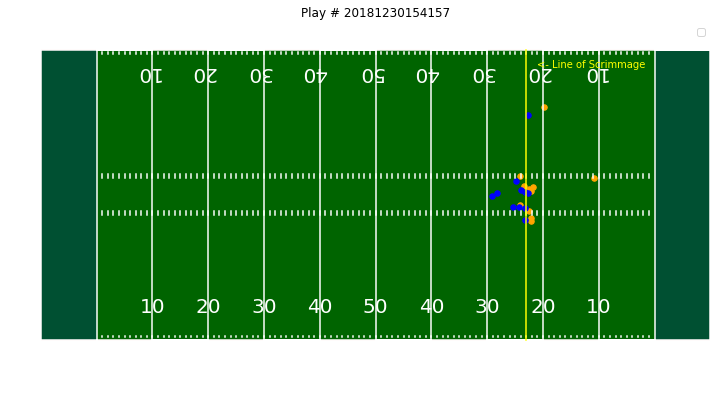

In [5]:
yl = train.query("PlayId == @playid")['YardLine'].tolist()[0]
fig, ax = create_football_field(highlight_line=True,
                                highlight_line_number=yl+54)
train.query("PlayId == @playid and Team == 'away'") \
    .plot(x='X', y='Y', kind='scatter', ax=ax, color='orange', s=30, legend='Away')
train.query("PlayId == @playid and Team == 'home'") \
    .plot(x='X', y='Y', kind='scatter', ax=ax, color='blue', s=30, legend='Home')
plt.title(f'Play # {playid}')
plt.legend()
plt.show()

# On 2021 Datset
- Note in the 2021 dataset some things have changed.
    - The `X` and `Y` columns are now lowercase `x` and `y`
    - Data is provided for the entire play, not just one time within a play.
    - PlayId is not unique across games, only within the game. So for unique ids you need to use a combination of gameId and playId

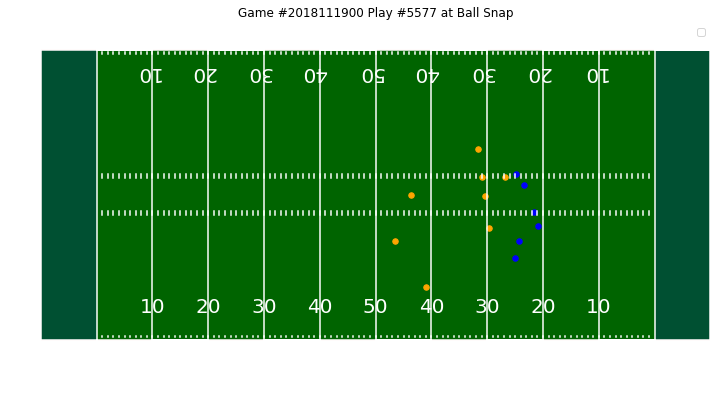

In [6]:
train2021 = pd.read_csv('../input/nfl-big-data-bowl-2021/week11.csv')

example_play_home = train2021.query('gameId == 2018111900 and playId == 5577 and team == "home"')
example_play_away = train2021.query('gameId == 2018111900 and playId == 5577 and team == "away"')

fig, ax = create_football_field()
example_play_home.query('event == "ball_snap"').plot(x='x', y='y', kind='scatter', ax=ax, color='orange', s=30, legend='Away')
example_play_away.query('event == "ball_snap"').plot(x='x', y='y', kind='scatter', ax=ax, color='blue', s=30, legend='Home')
plt.title('Game #2018111900 Play #5577 at Ball Snap')
plt.legend()
plt.show()

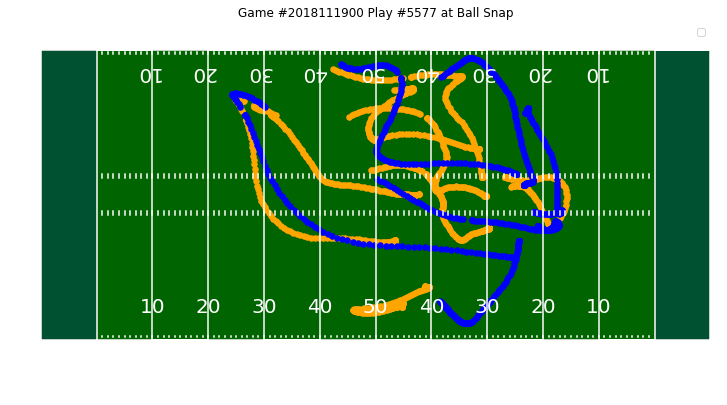

In [7]:
fig, ax = create_football_field()
example_play_home.plot(x='x', y='y', kind='scatter', ax=ax, color='orange', s=30, legend='Away')
example_play_away.plot(x='x', y='y', kind='scatter', ax=ax, color='blue', s=30, legend='Home')
plt.title('Game #2018111900 Play #5577 at Ball Snap')
plt.legend()
plt.show()